In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from sklearn.preprocessing import OneHotEncoder

# 1. Load dataset 

In [70]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Head, shape, information and d_types

customer_df.head()

customer_df.shape

customer_df.info

In [71]:
data_types = customer_df.dtypes
print(data_types)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


# 2. Remove 'customer id' 

We want to rmove the "customer" column because it is an alpha-numerical field which does not apply to our model, this information is rather applied to a database to identify each of the records. 

In [83]:
customer_df.drop('Customer', inplace=True, axis=1)

We do not run this code since the column 'Customer', which refers to the customer id data type, has already been removed. 

In [84]:
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 3. Convert dataset column names into PE8 standard

In [85]:
new_column_names = {
    'State': 'state',
    'Customer Lifetime Value': 'customer_lifetime_value',
    'Response': 'response',
    'Coverage': 'coverage',
    'Education': 'education',
    'Effective To Date': 'effective_to_date',
    'EmploymentStatus': 'employment_status',
    'Gender': 'gender',
    'Income': 'income',
    'Location Code': 'location_code',
    'Marital Status': 'marital_status',
    'Monthly Premium Auto': 'monthly_premium_auto',
    'Months Since Last Claim': 'months_since_last_claim',
    'Months Since Policy Inception': 'months_since_policy_inception',
    'Number of Open Complaints': 'number_of_open_complaints',
    'Number of Policies': 'number_of_policies',
    'Policy Type': 'policy_type',
    'Policy': 'policy',
    'Renew Offer Type': 'renew_offer_type',
    'Sales Channel': 'sales_channel',
    'Total Claim Amount': 'total_claim_amount',
    'Vehicle Class': 'vehicle_class',
    'Vehicle Size': 'vehicle_size'
}

In [86]:
customer_df_2 = customer_df.rename(columns=new_column_names)
customer_df_2 

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# 4. Get numerical and categorical variables 

In [87]:
num = customer_df_2.select_dtypes(include=['float64', 'int64'])
num 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [88]:
for col in num.columns:
    print(col)

customer_lifetime_value
income
monthly_premium_auto
months_since_last_claim
months_since_policy_inception
number_of_open_complaints
number_of_policies
total_claim_amount


In [89]:
cat = customer_df_2.select_dtypes(include=['object'])
cat 

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [90]:
for col in cat.columns:
    print(col)

state
response
coverage
education
effective_to_date
employment_status
gender
location_code
marital_status
policy_type
policy
renew_offer_type
sales_channel
vehicle_class
vehicle_size


We verify that the column "effective_to_date" is properly expressed in date-time format and it is part of the categorical data

In [91]:
date_format_valid = pd.to_datetime(customer_df_2['effective_to_date'], errors='coerce').notnull().all()

In [92]:
if date_format_valid:
    print("The 'Effective To Date' column is properly formatted.")
else:
    print("The 'Effective To Date' column is not properly formatted.")

The 'Effective To Date' column is properly formatted.


# 5. Correlation matrix / interpretations 

In [93]:
correlation_matrix = customer_df_2.corr()
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


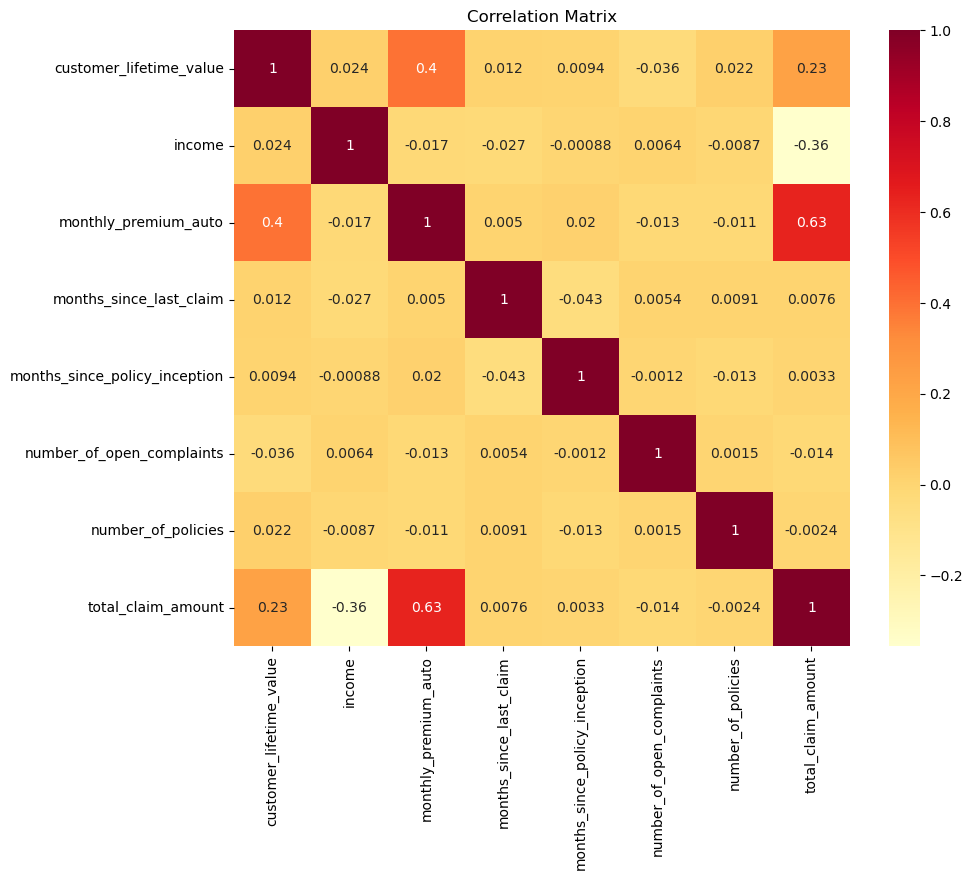

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd", square=True)
plt.title("Correlation Matrix")
plt.show()

As seen in the correlation heatmap above, we see that there is a significant relationship (0.4) between 'montly premium auto' and 'customer lifetime value'. There is also a strong correlation between the 'montly premium auto' and 'total claim amount' (0.6). On the other hand, income has a negative relationship with 'total claim amount' (-0.36). 

The above may indicate that customers who pay higher monthly premiums generate a higher lifetime value (LTV). 

On the other hand, customers that pay higher monthly premium also tend to file claims for higher amounts. 

Also, claim amount tends to decrease thr higher the income level is. 

# 6. Plot continuous variables 

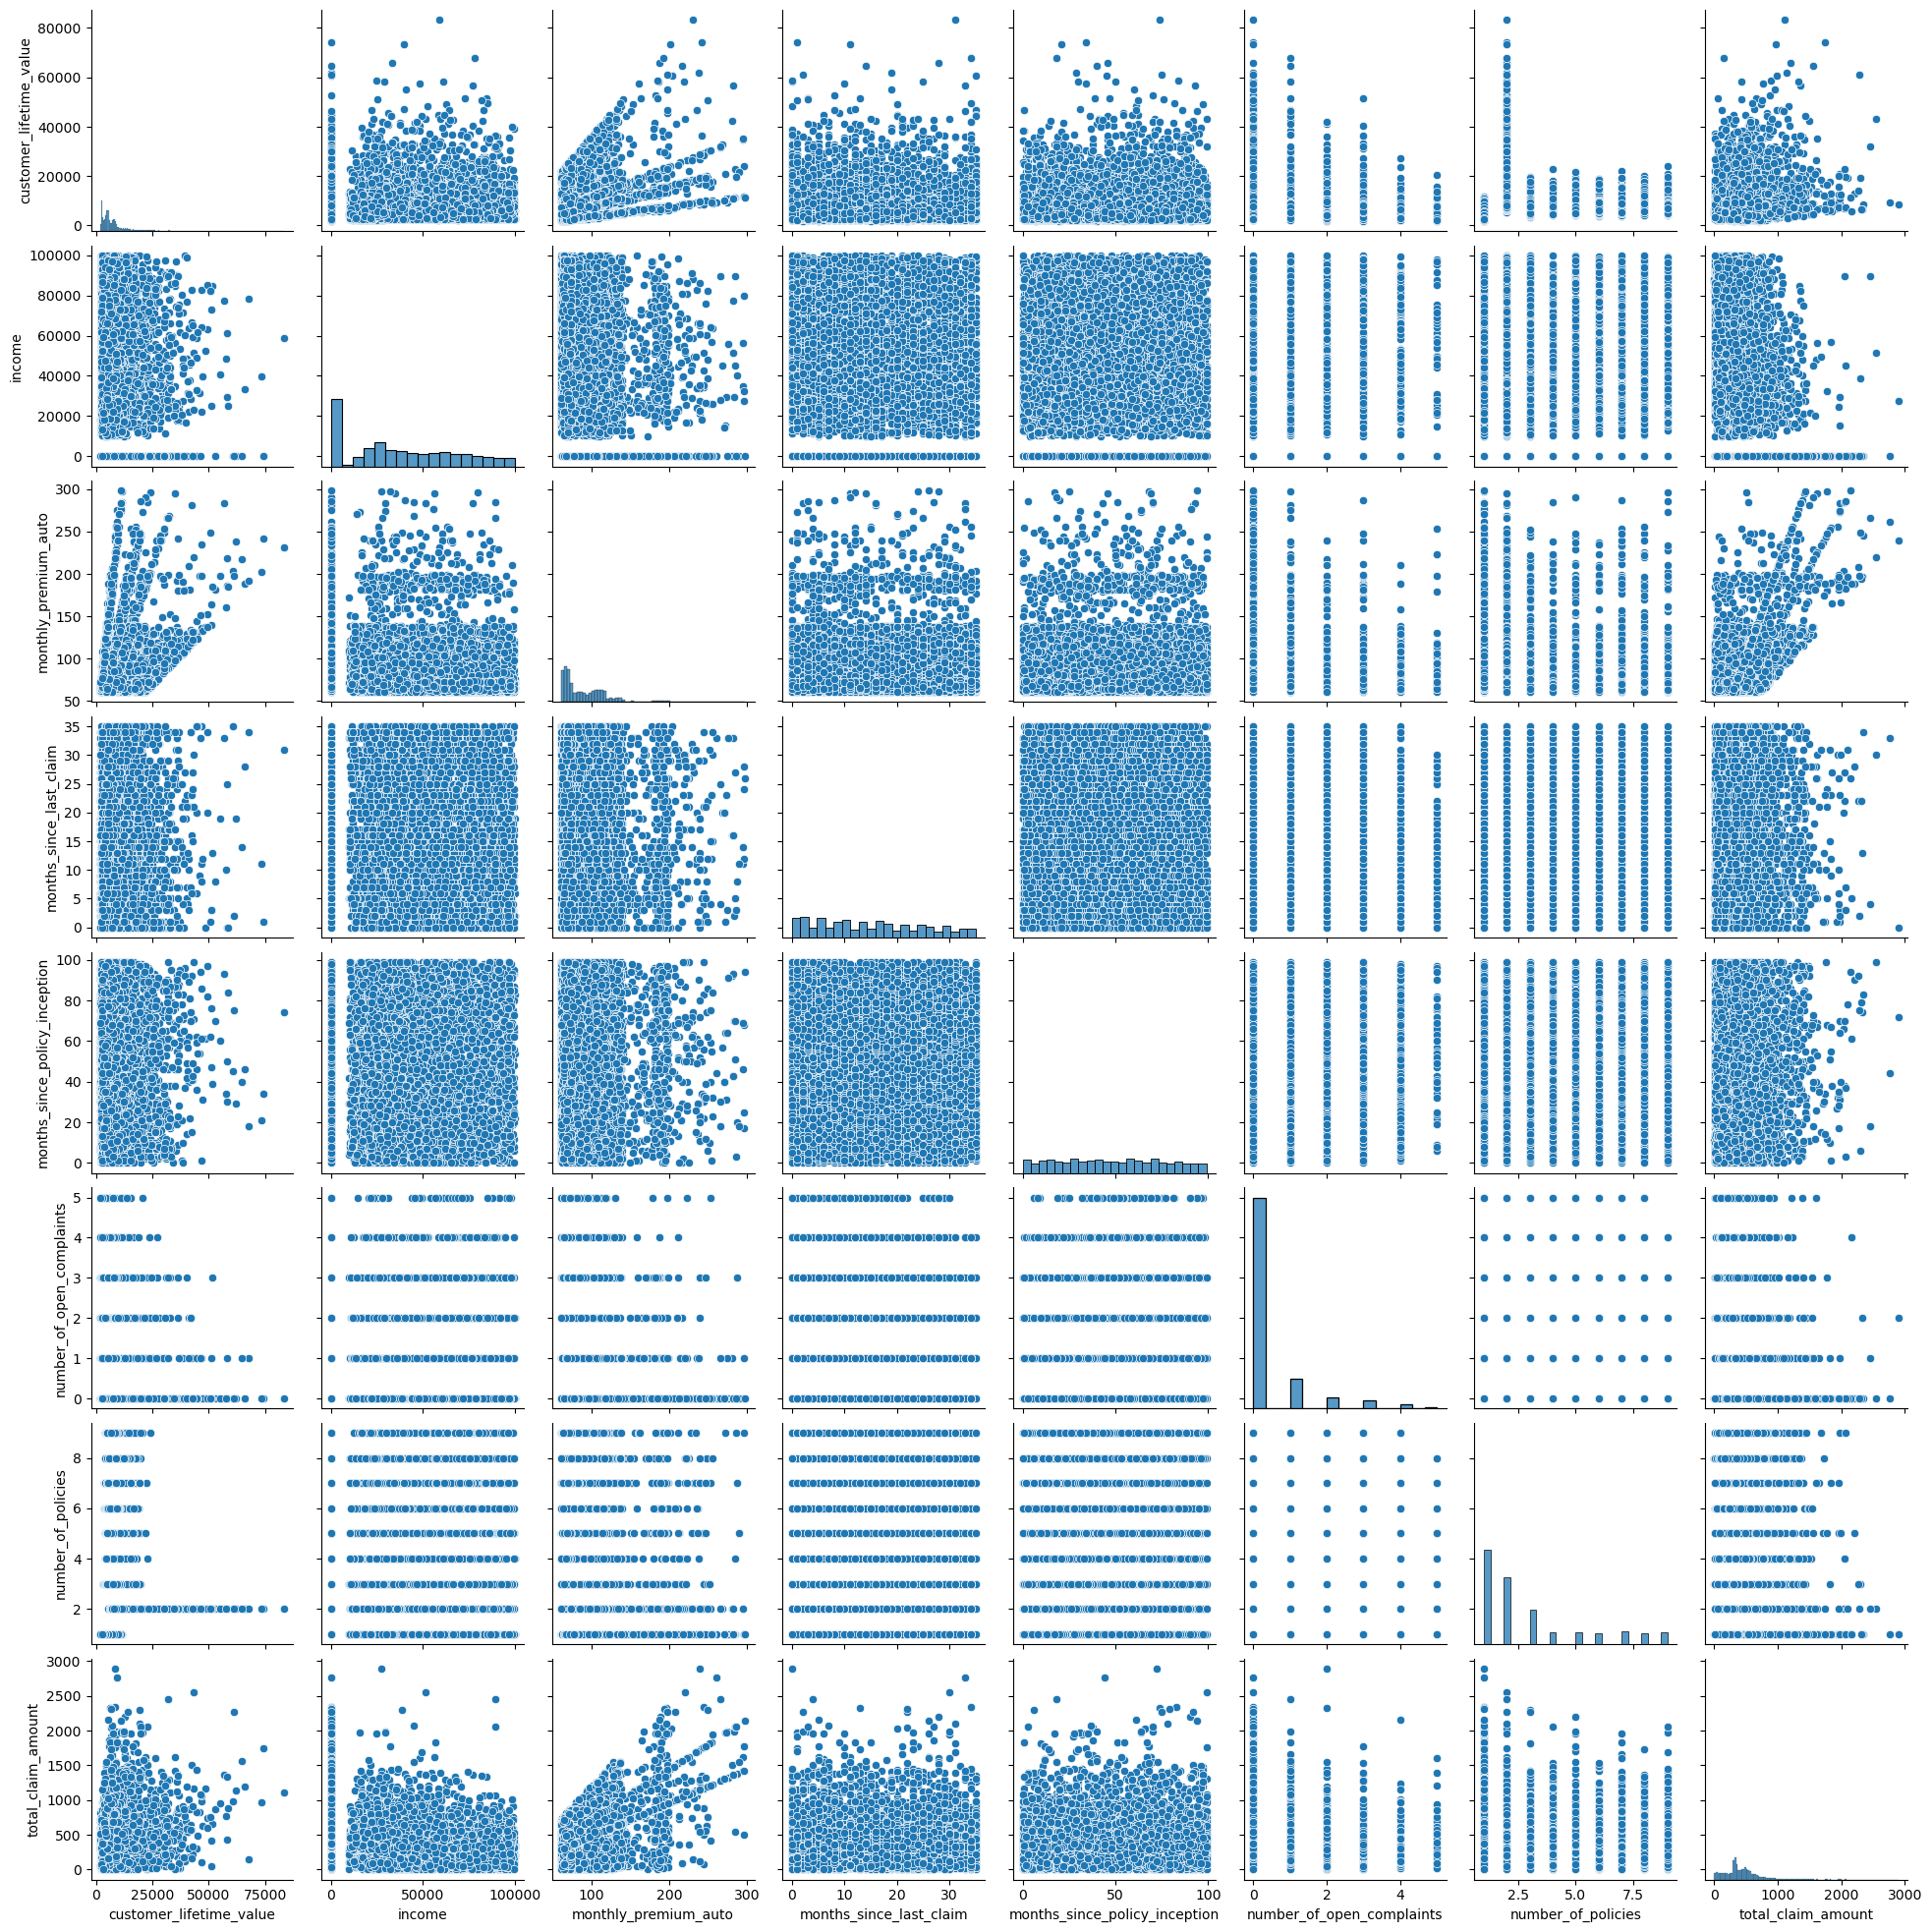

In [97]:
sns.pairplot(num)

# 7. Plot categorical variables 

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


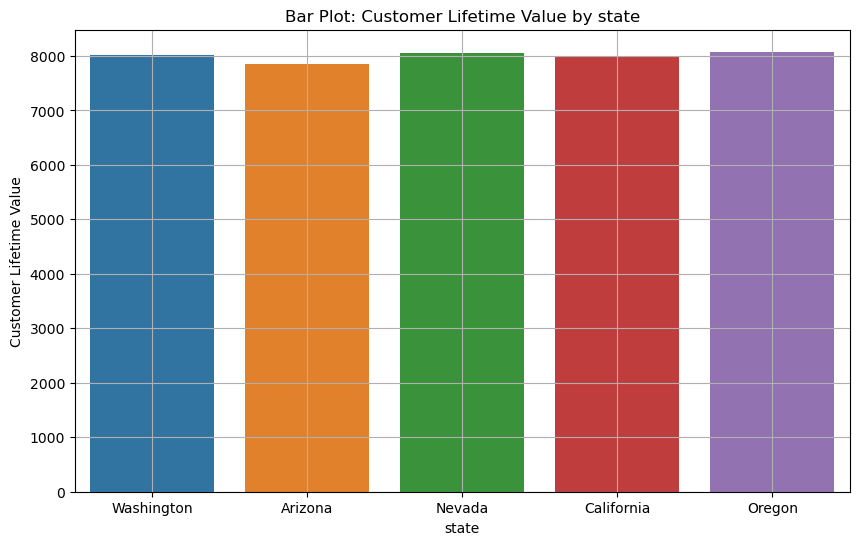

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


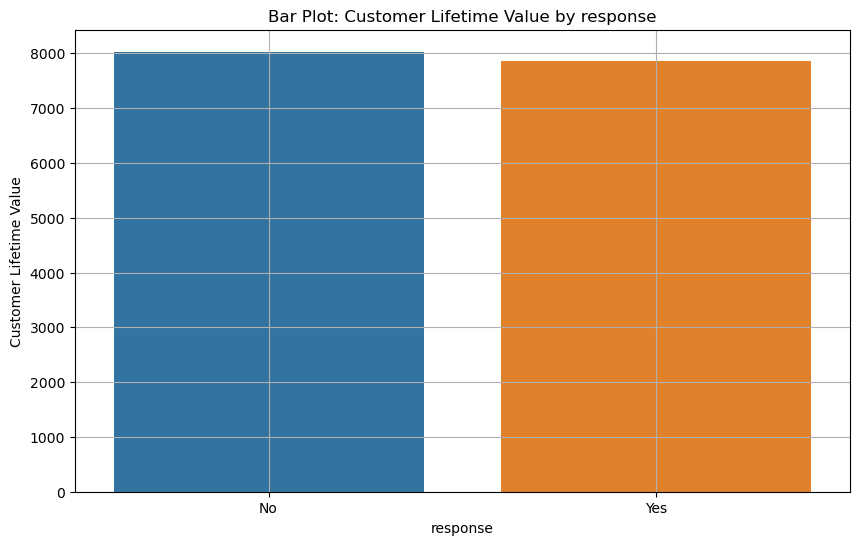

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


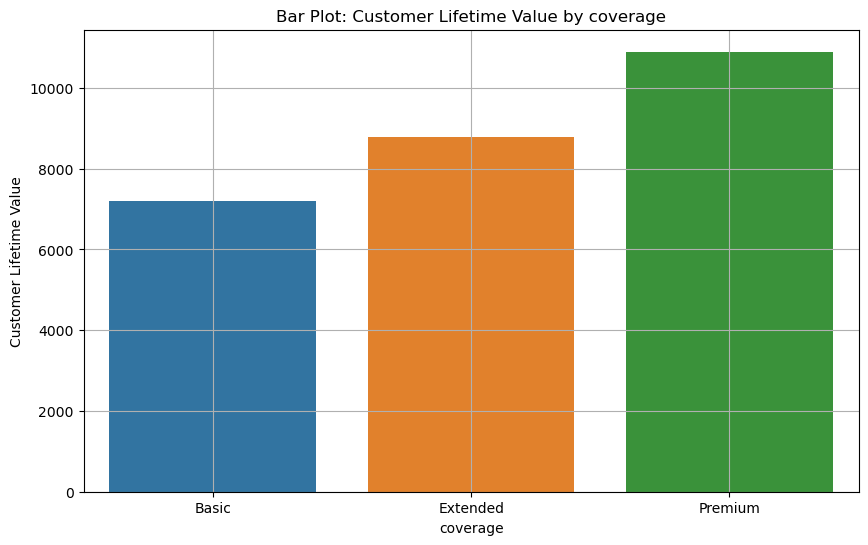

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


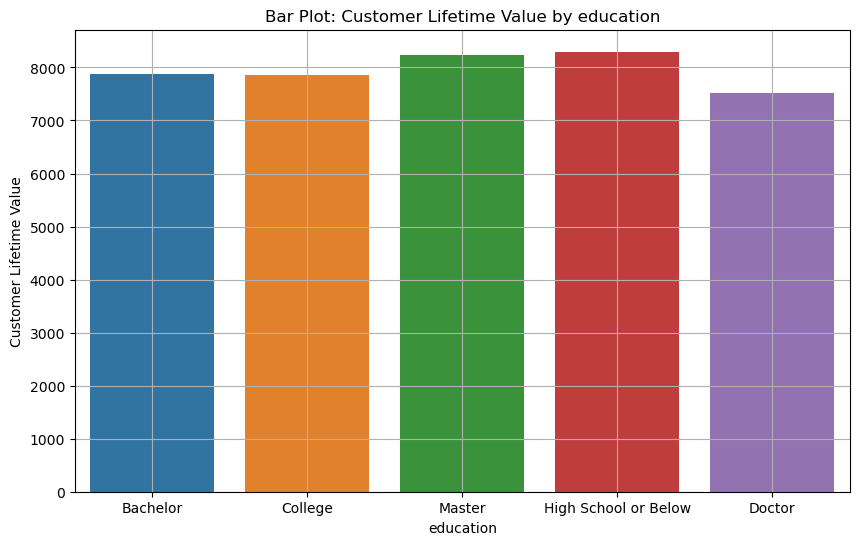

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


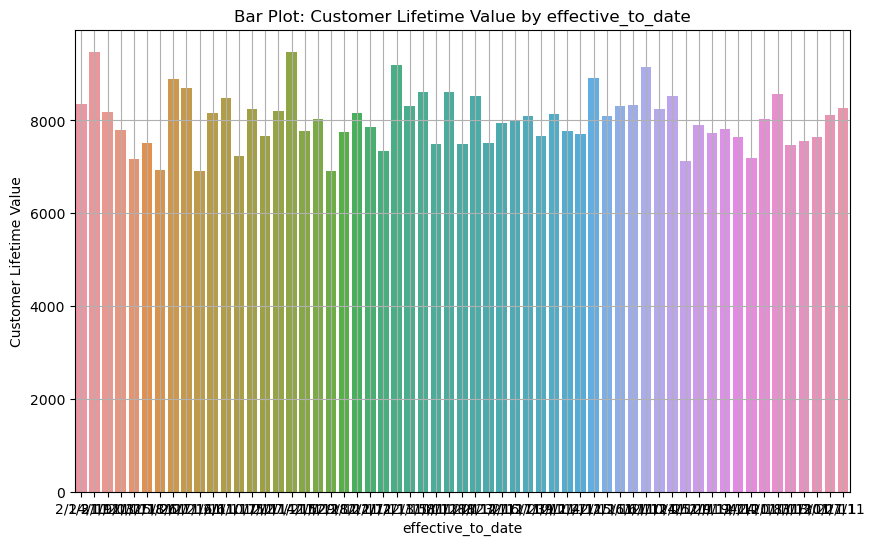

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


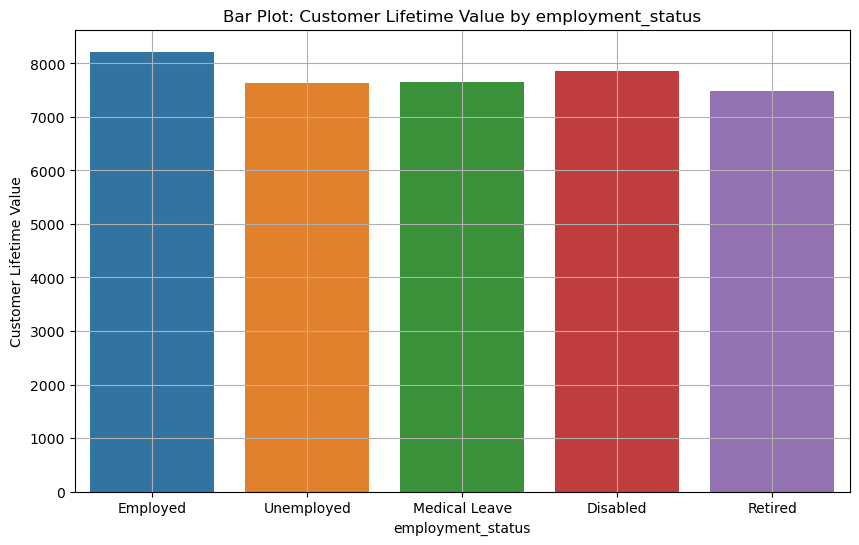

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


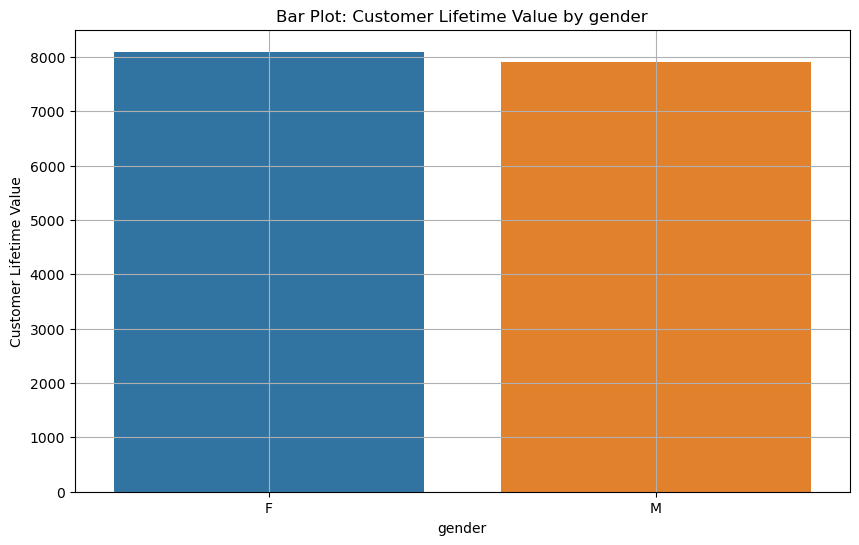

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


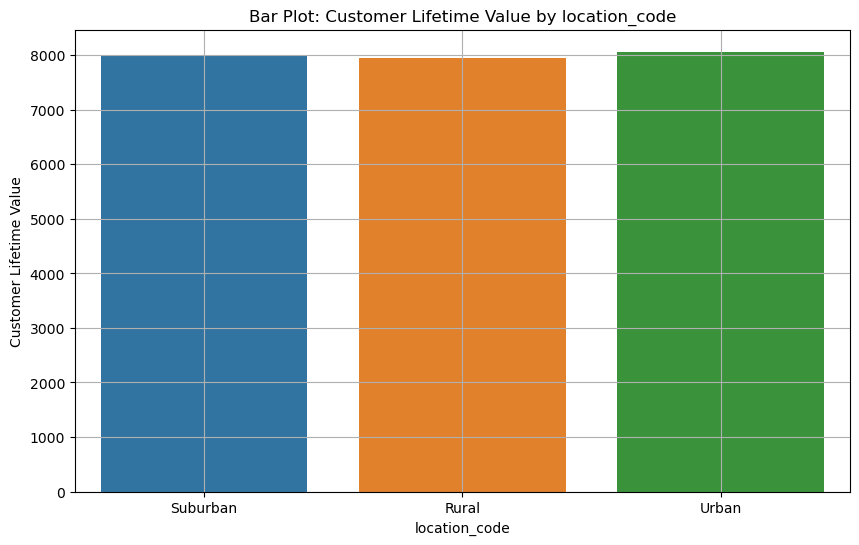

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


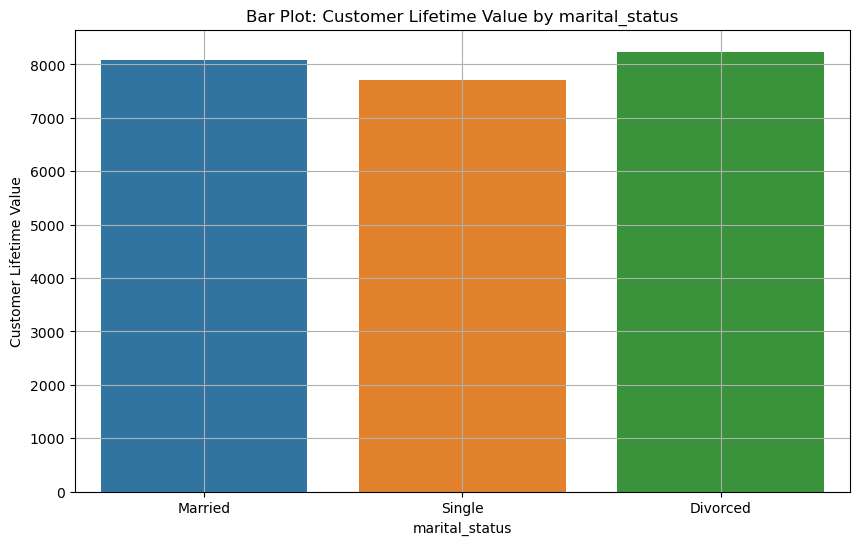

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


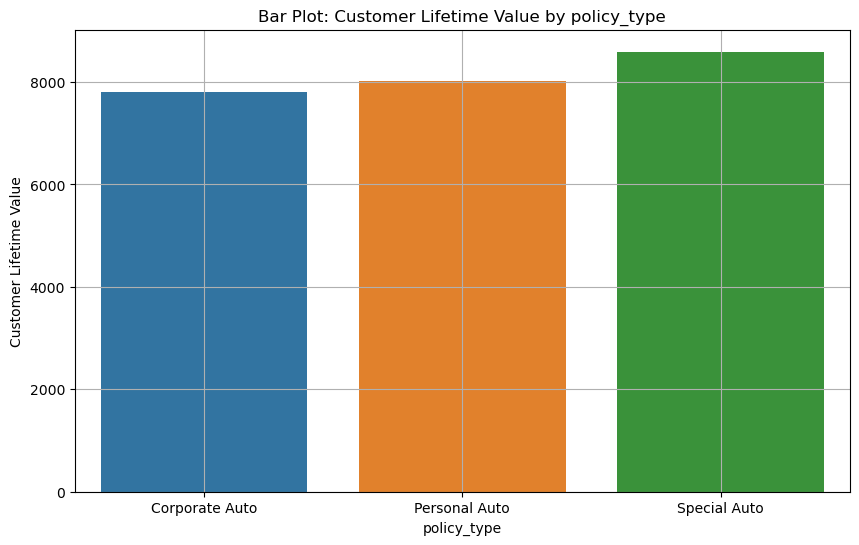

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


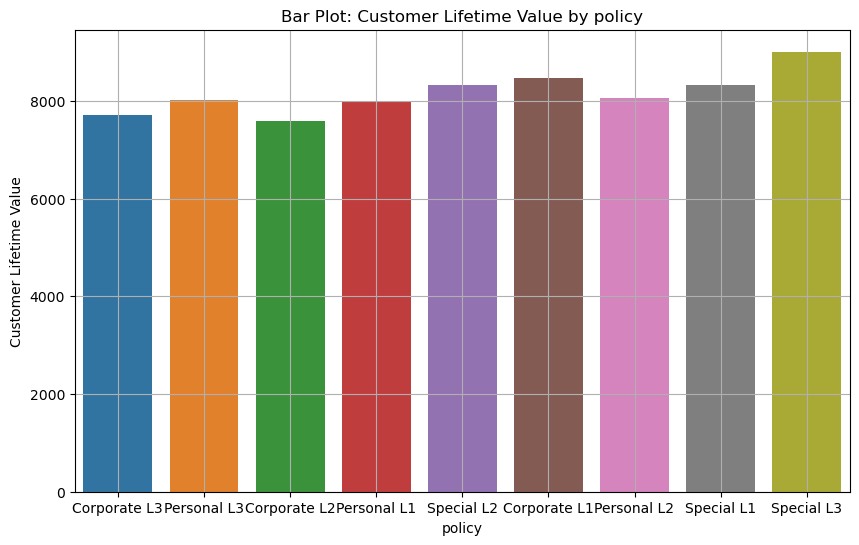

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


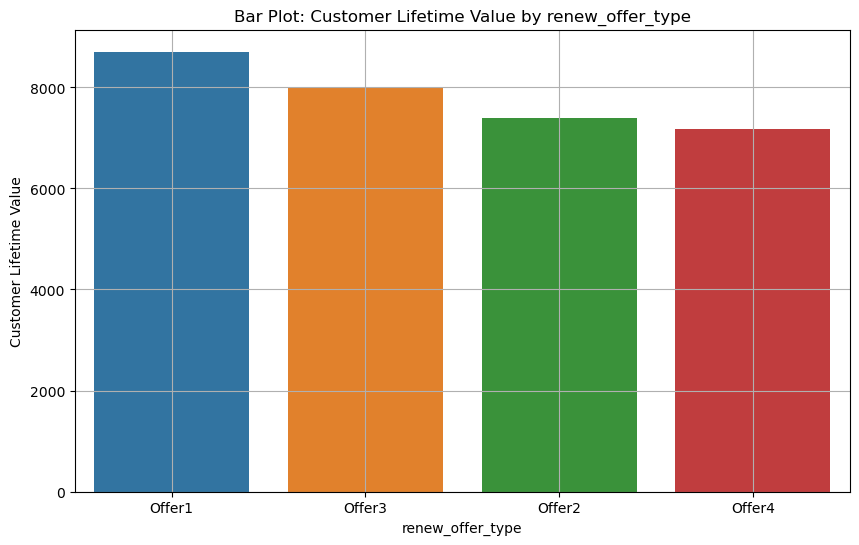

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


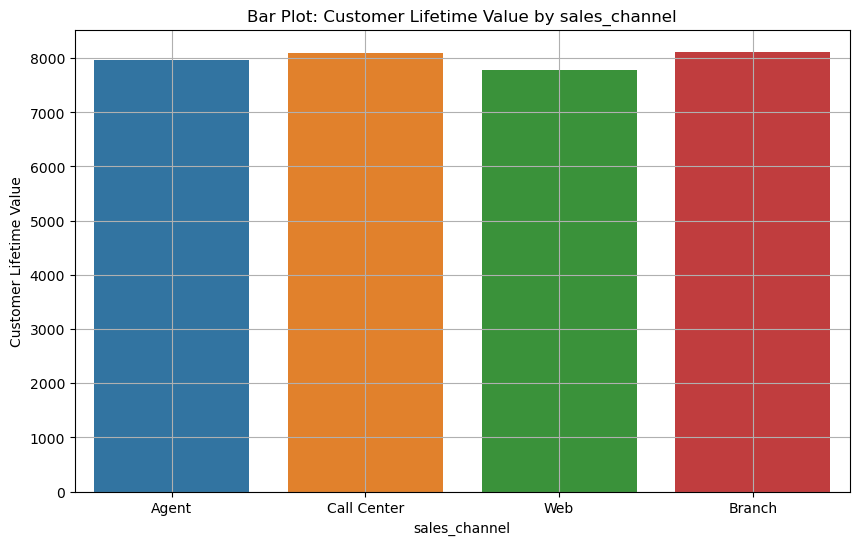

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


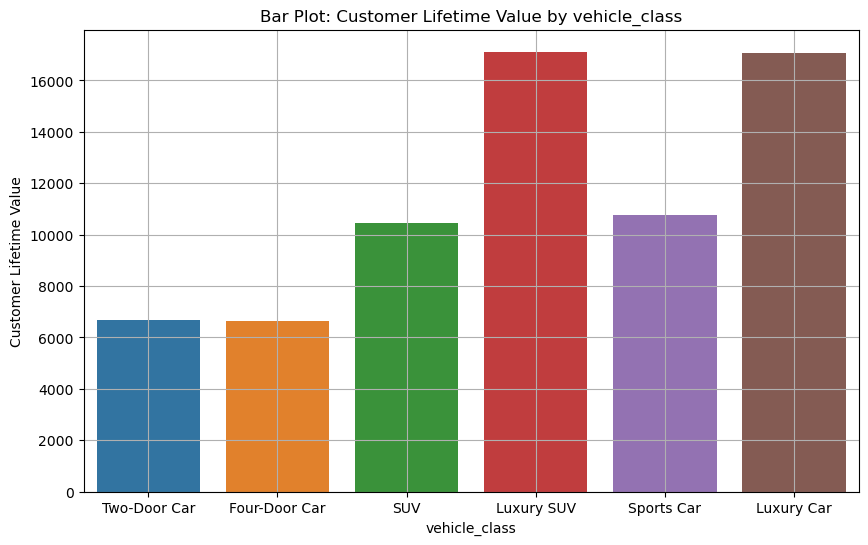

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\2933737402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)


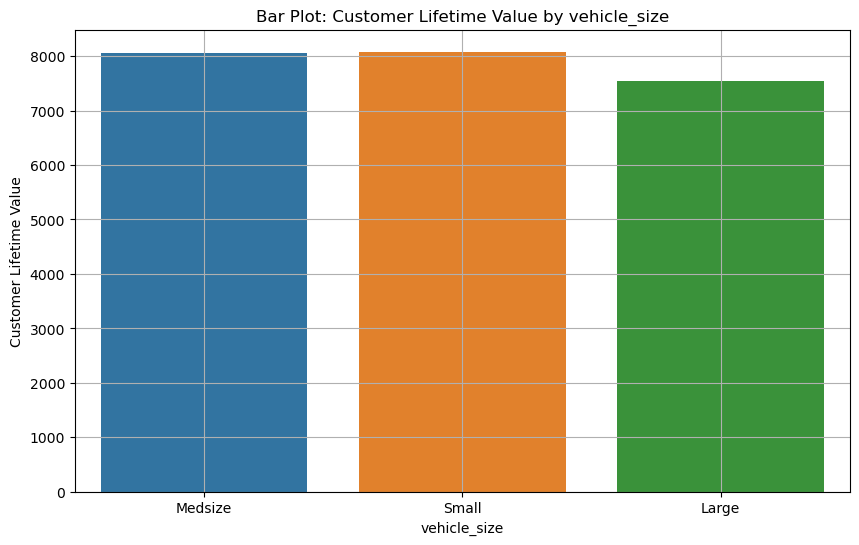

In [106]:
for categorical_var in cat:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=categorical_var, y='customer_lifetime_value', data=customer_df_2, ci=None)
    plt.xlabel(categorical_var)
    plt.ylabel('Customer Lifetime Value')
    plt.title(f'Bar Plot: Customer Lifetime Value by {categorical_var}')
    plt.grid(True)
    plt.show()

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


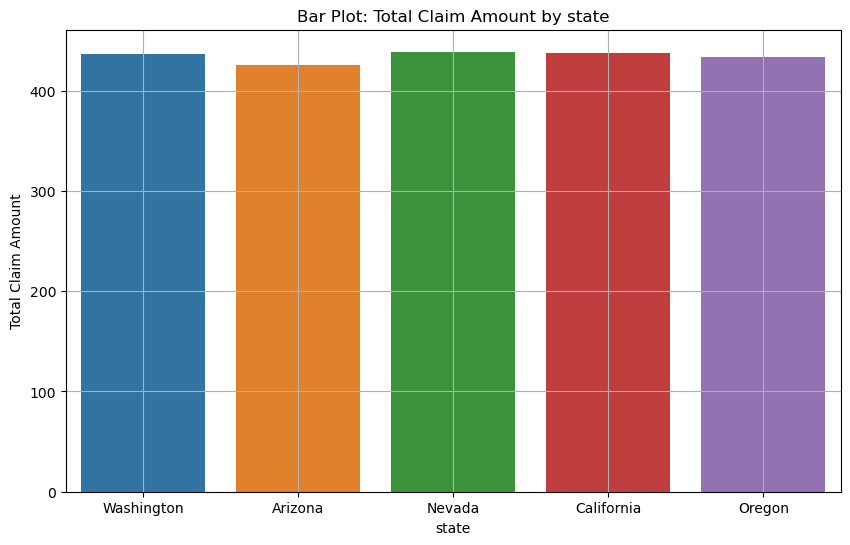

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


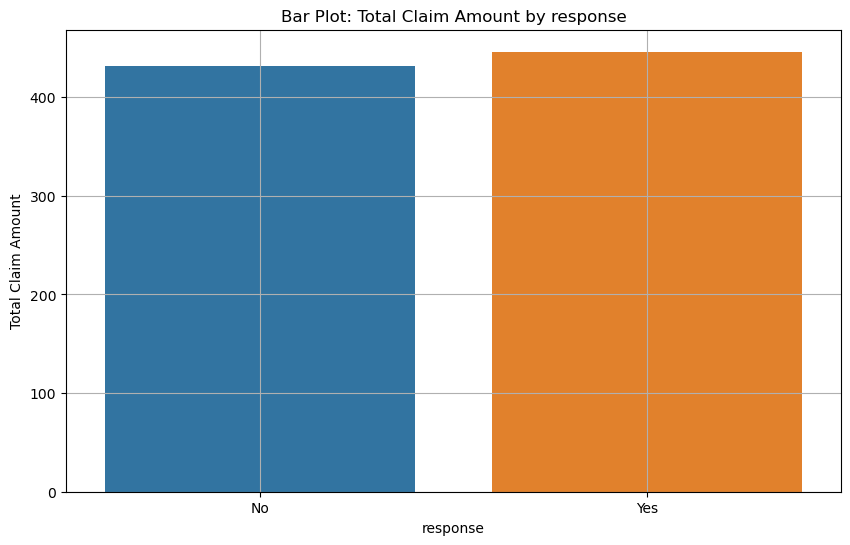

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


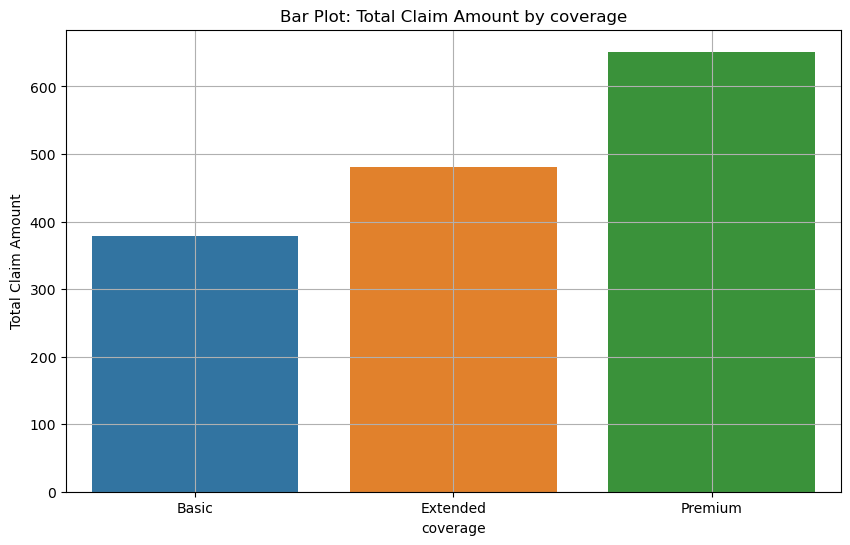

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


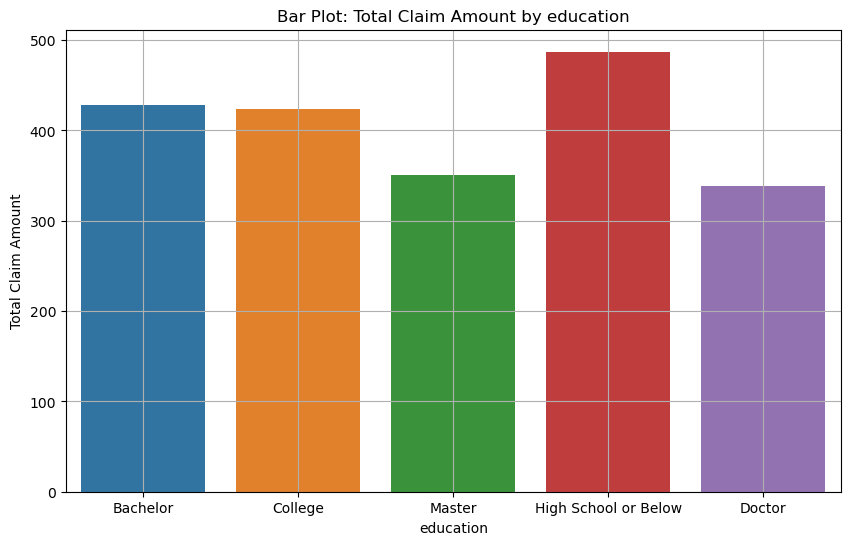

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


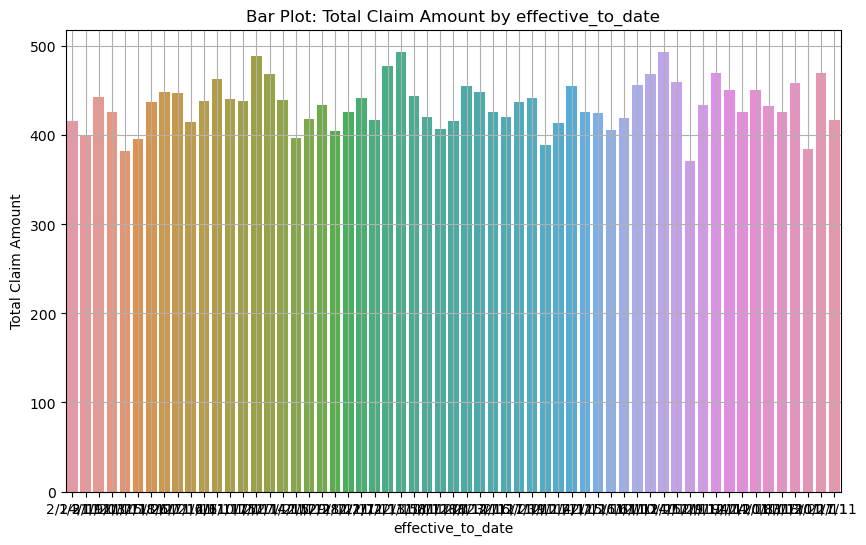

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


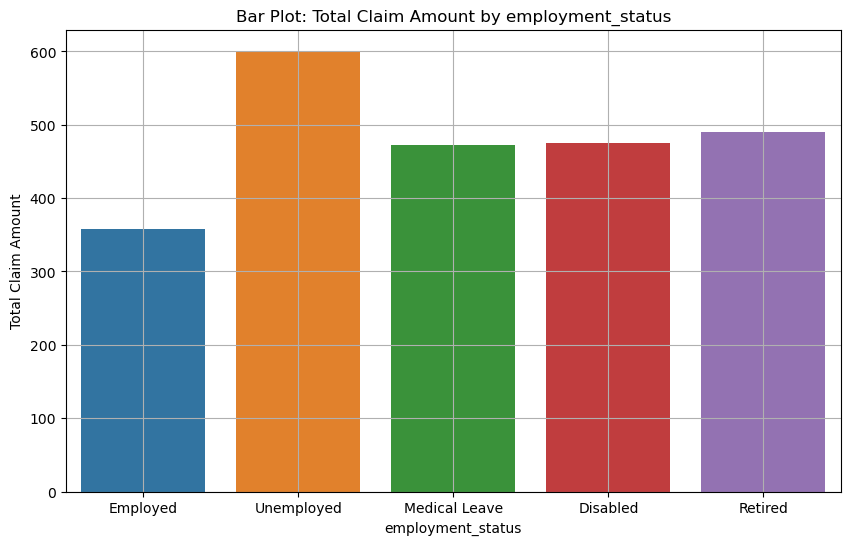

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


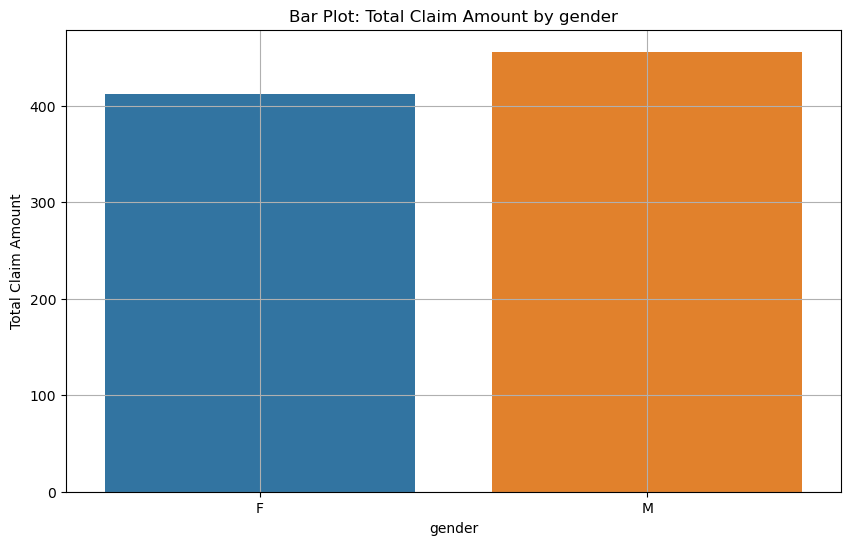

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


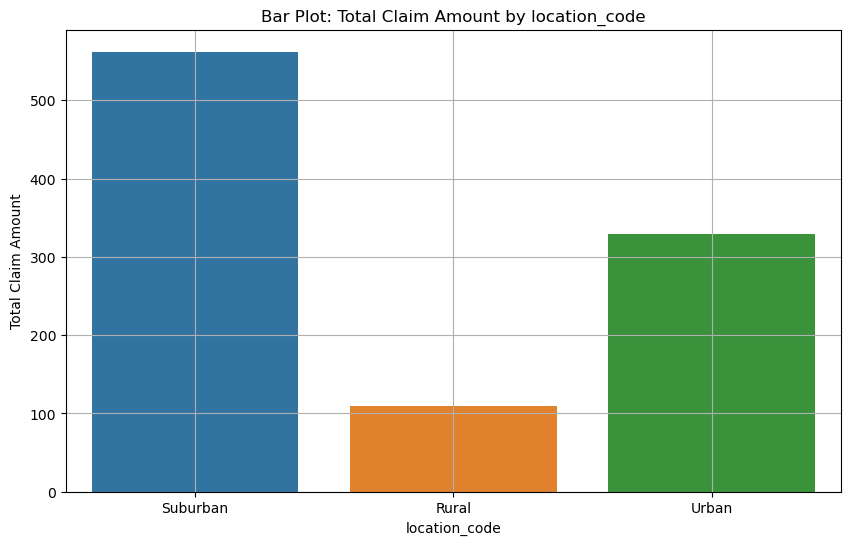

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


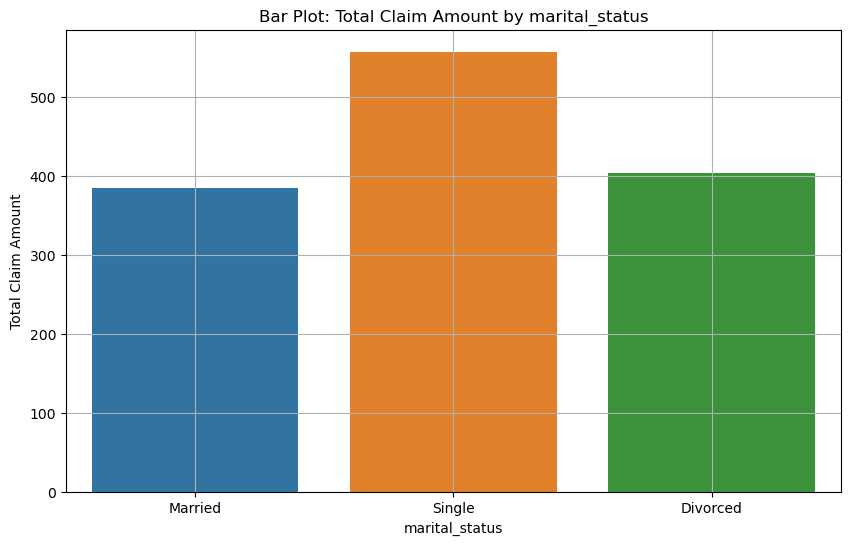

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


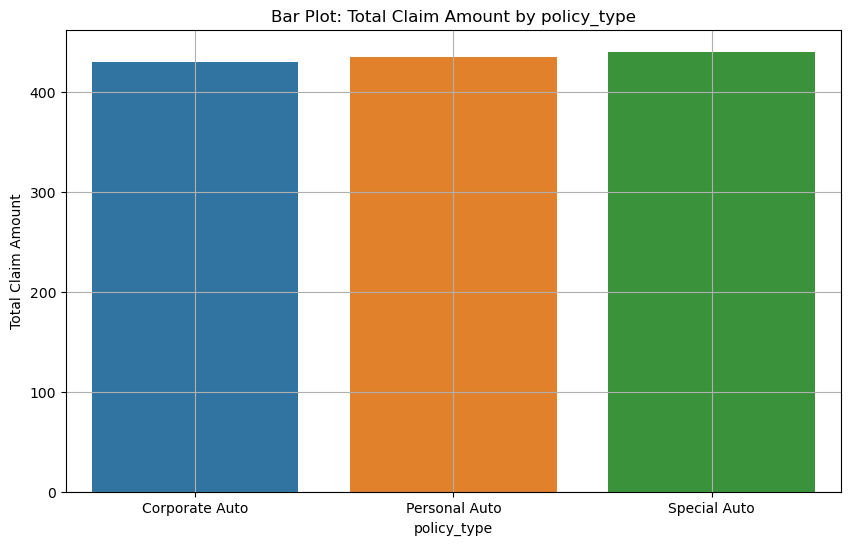

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


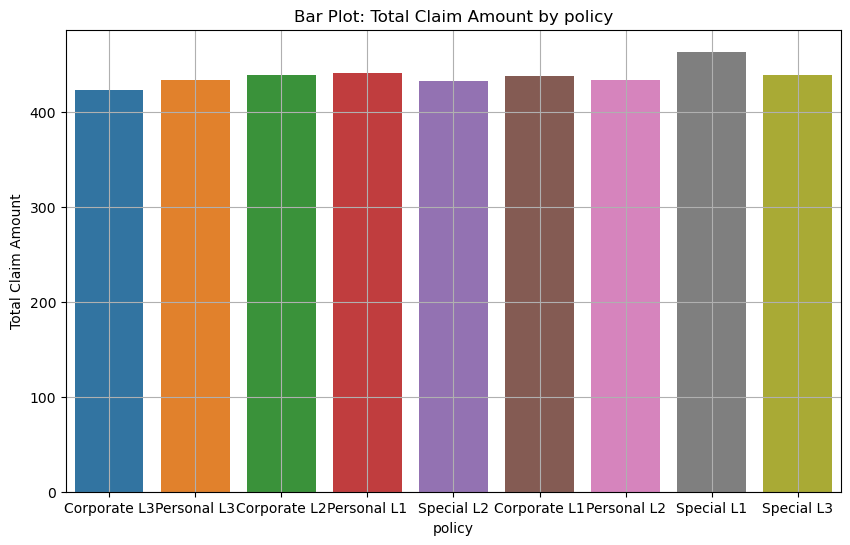

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


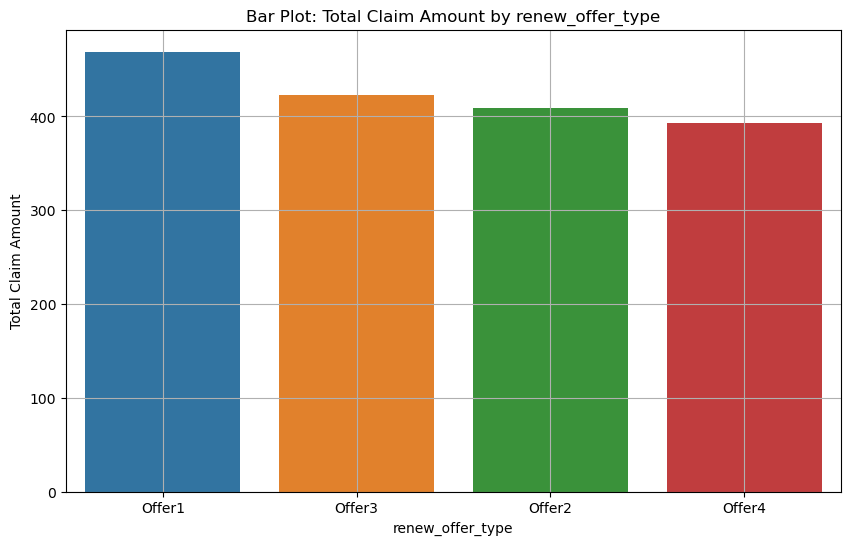

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


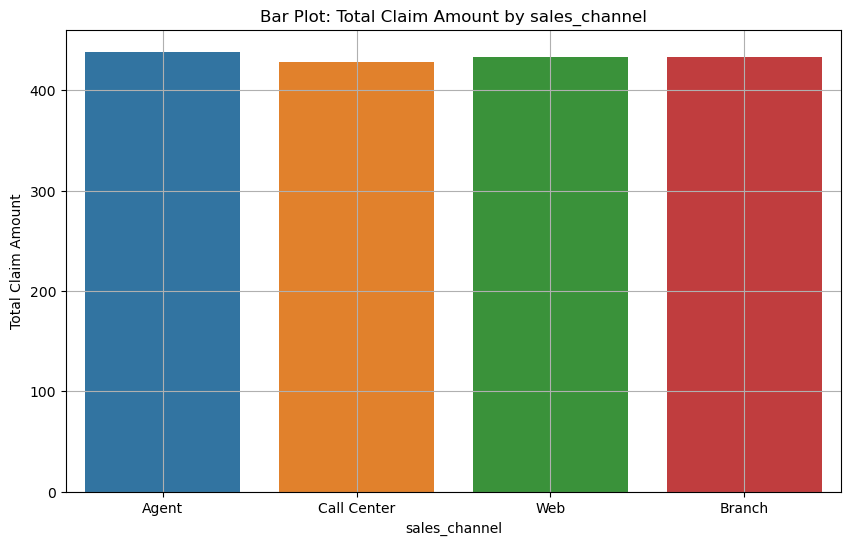

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


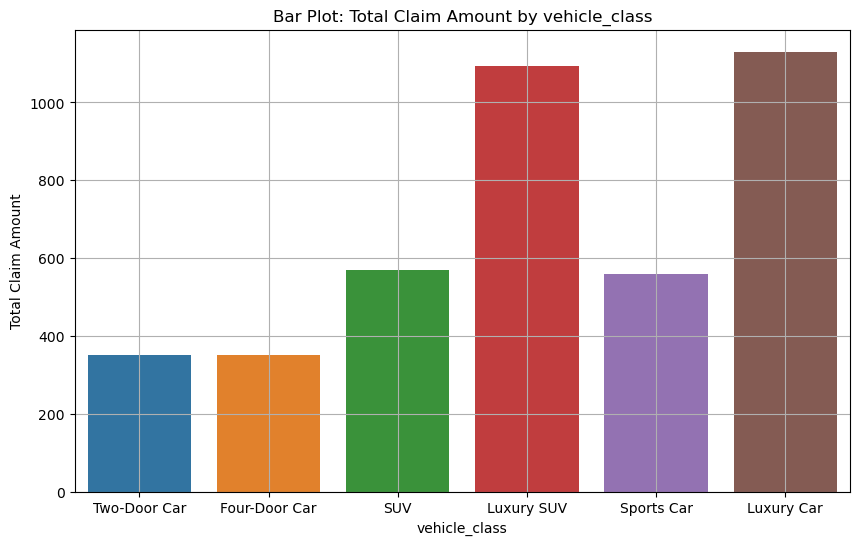

C:\Users\ruizg\AppData\Local\Temp\ipykernel_2284\25746043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)


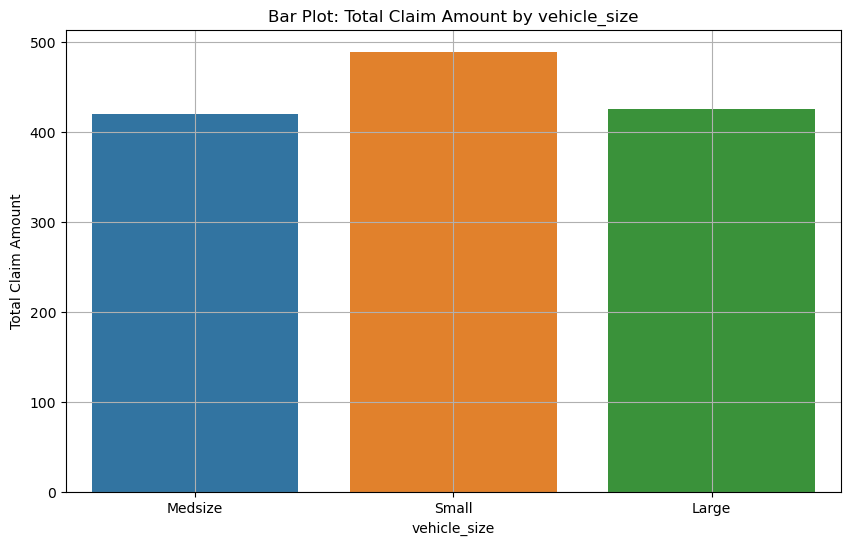

In [107]:
for categorical_var in cat:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=categorical_var, y='total_claim_amount', data=customer_df_2, ci=None)
    plt.xlabel(categorical_var)
    plt.ylabel('Total Claim Amount')
    plt.title(f'Bar Plot: Total Claim Amount by {categorical_var}')
    plt.grid(True)
    plt.show()

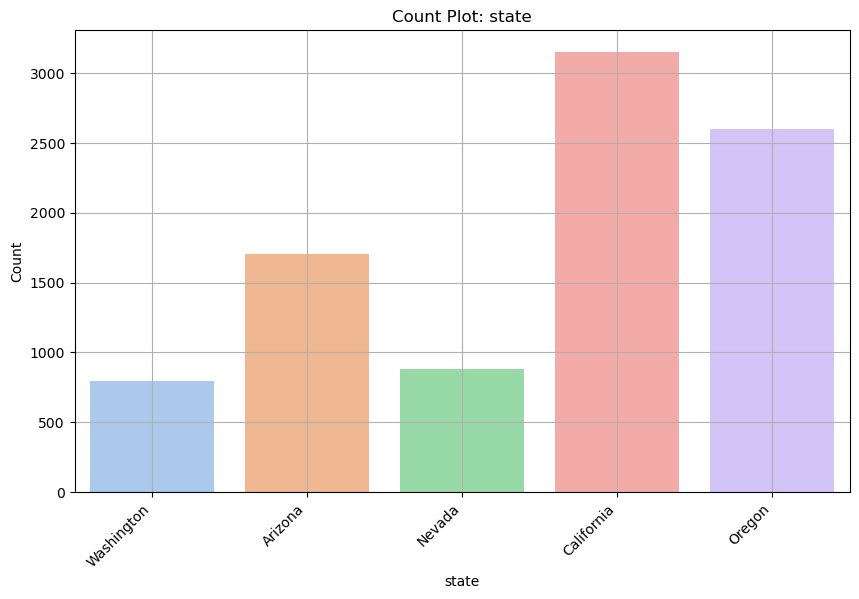

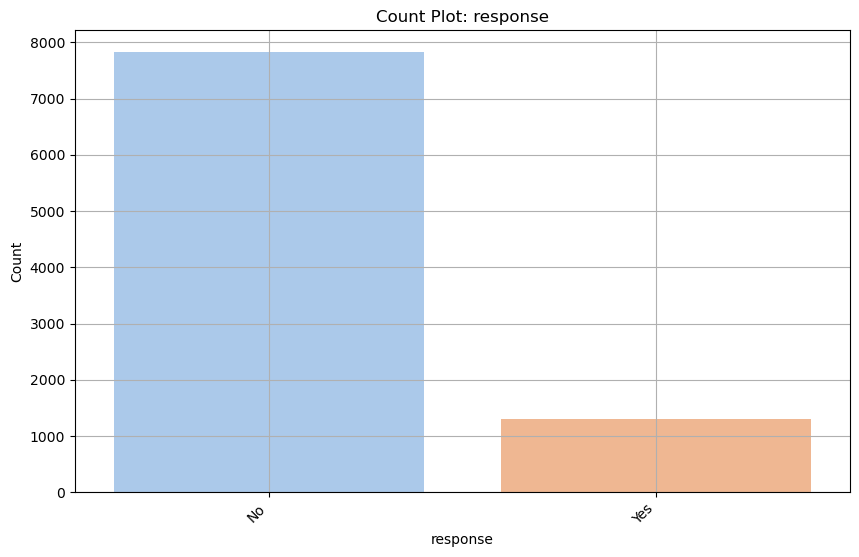

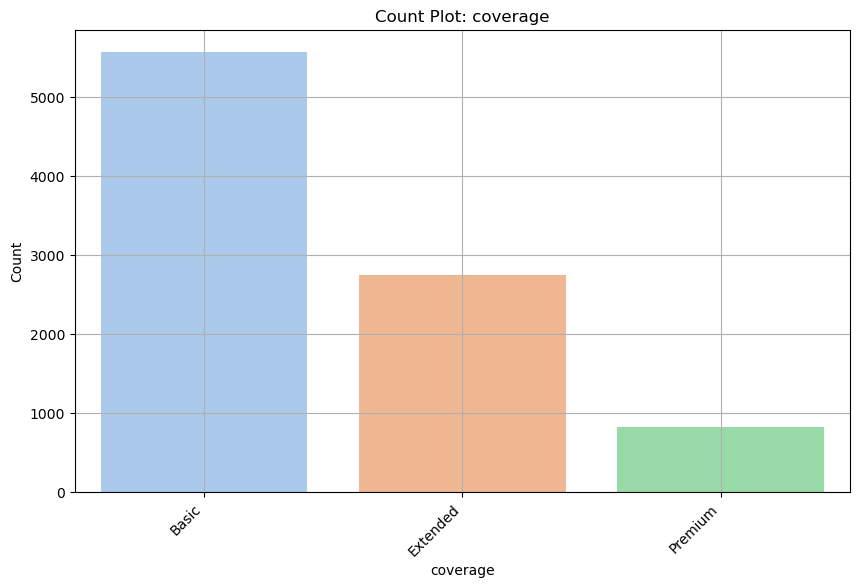

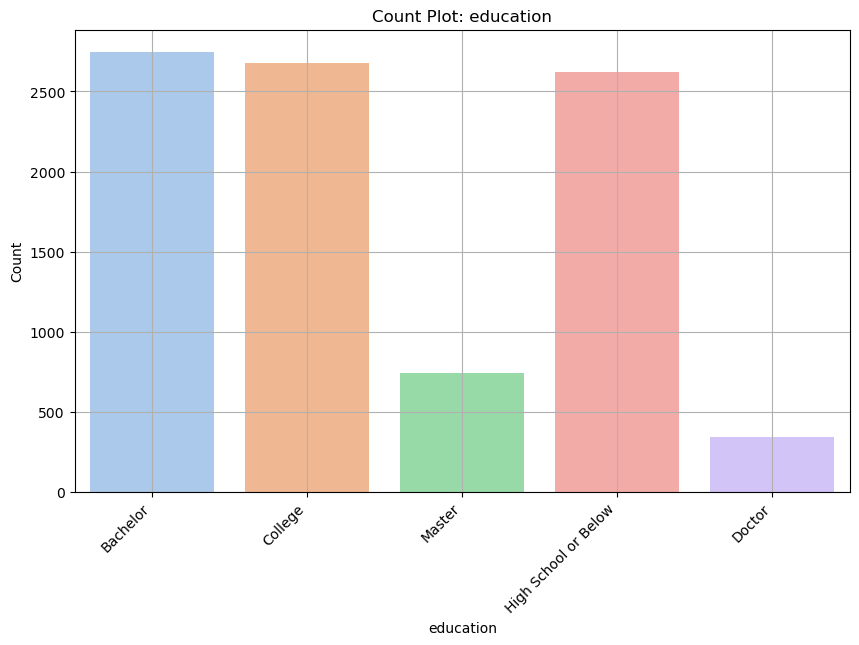

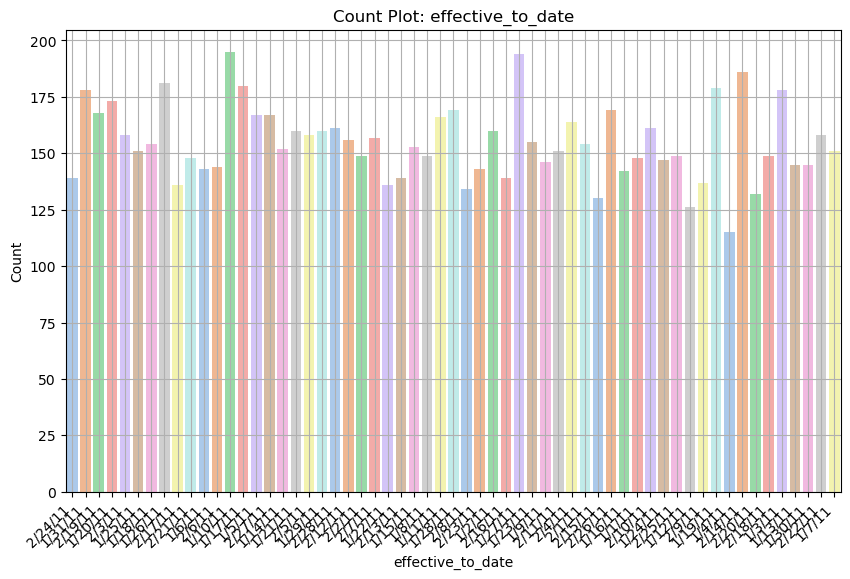

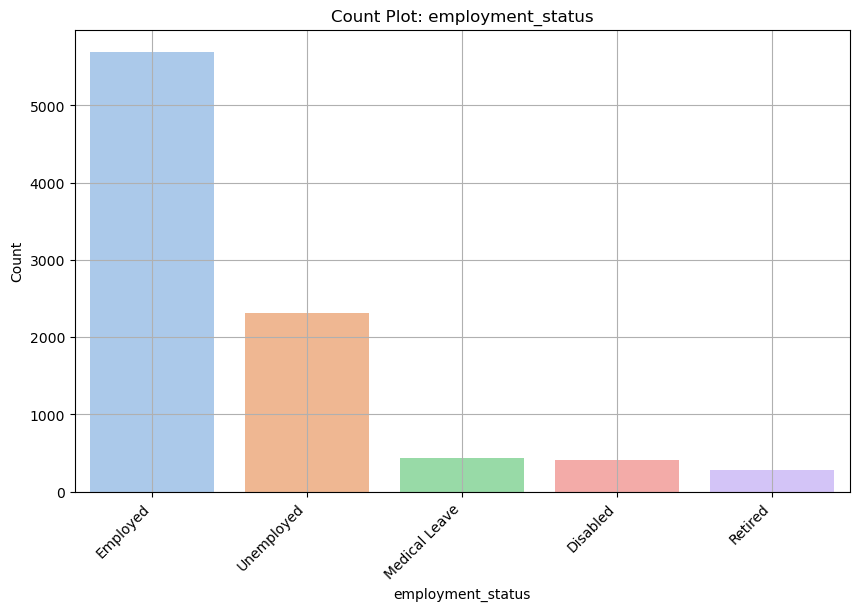

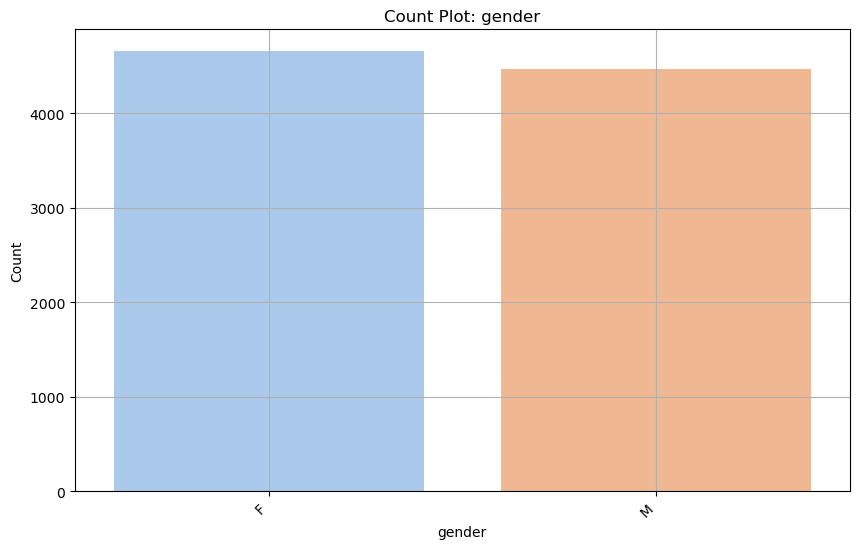

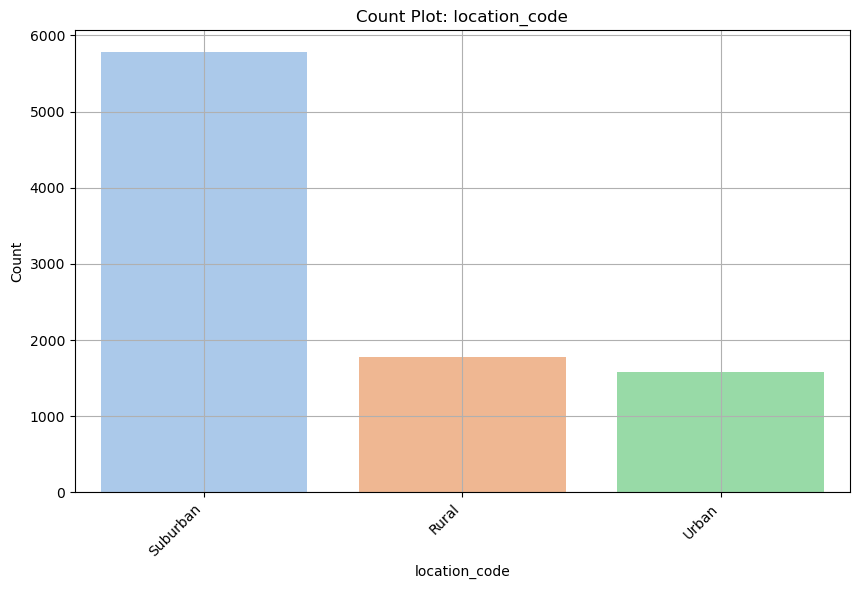

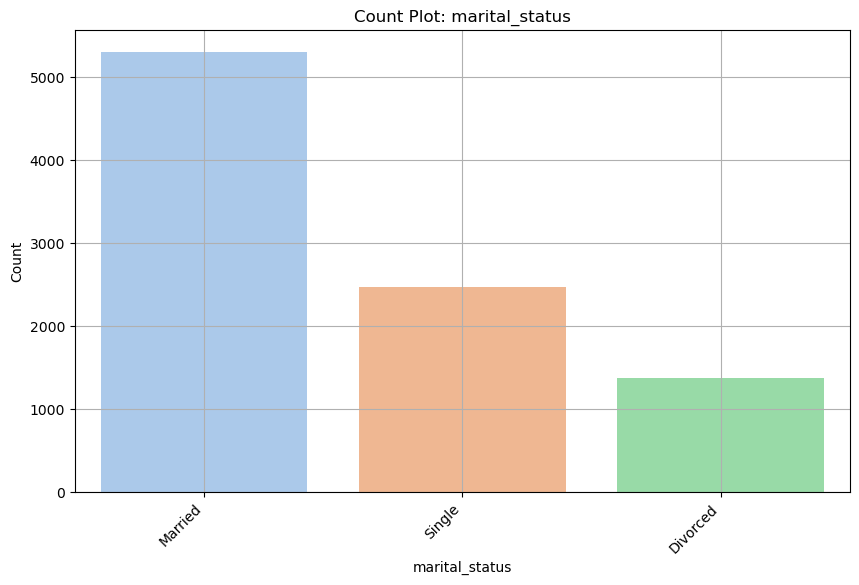

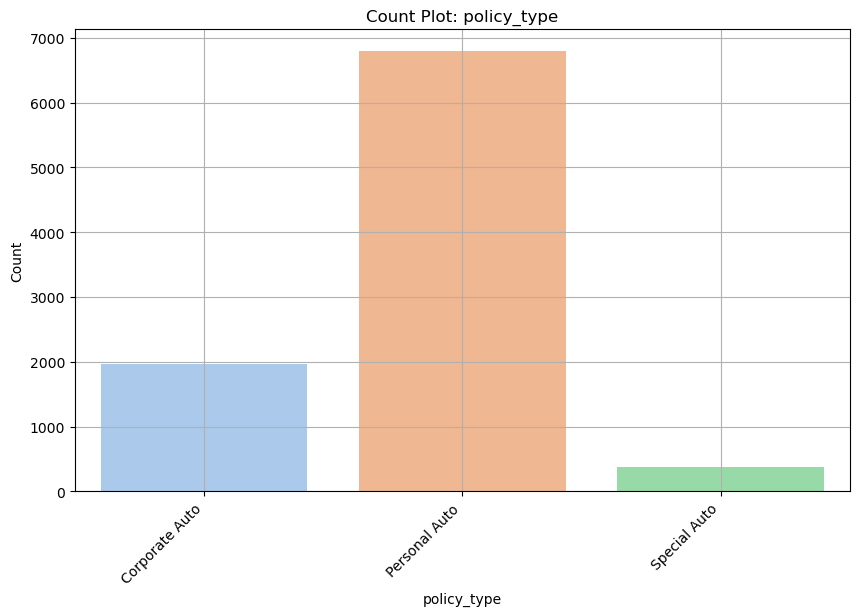

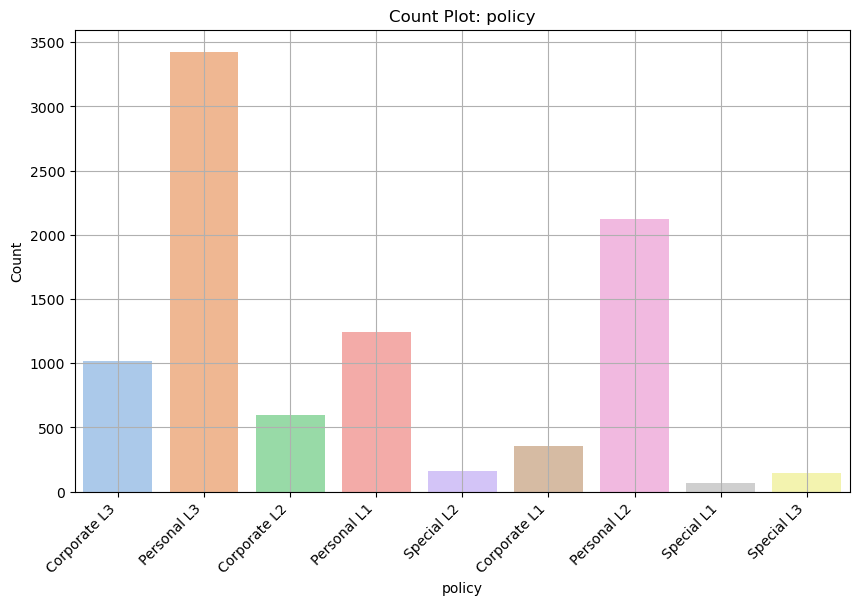

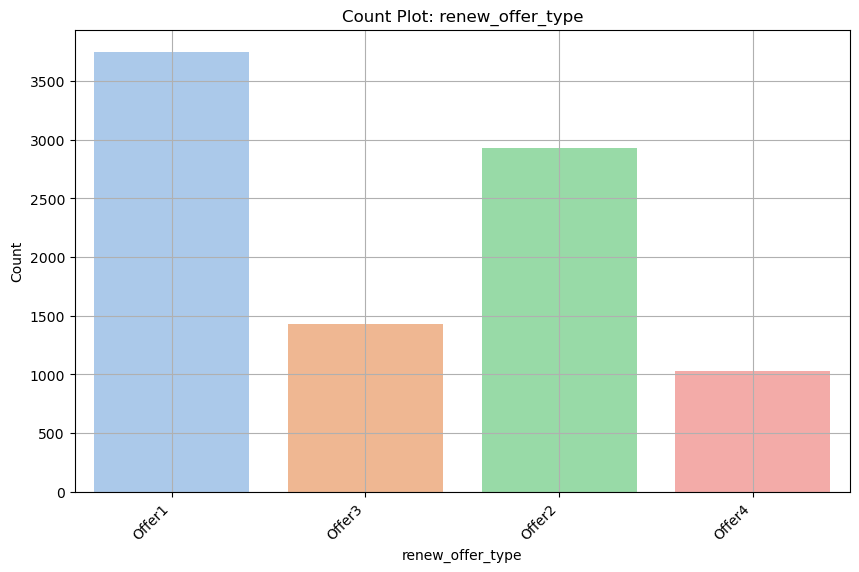

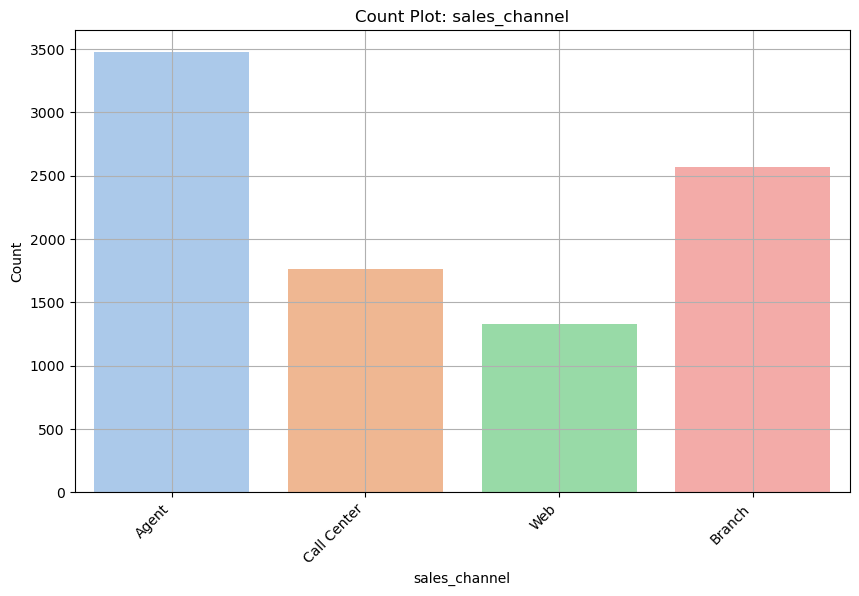

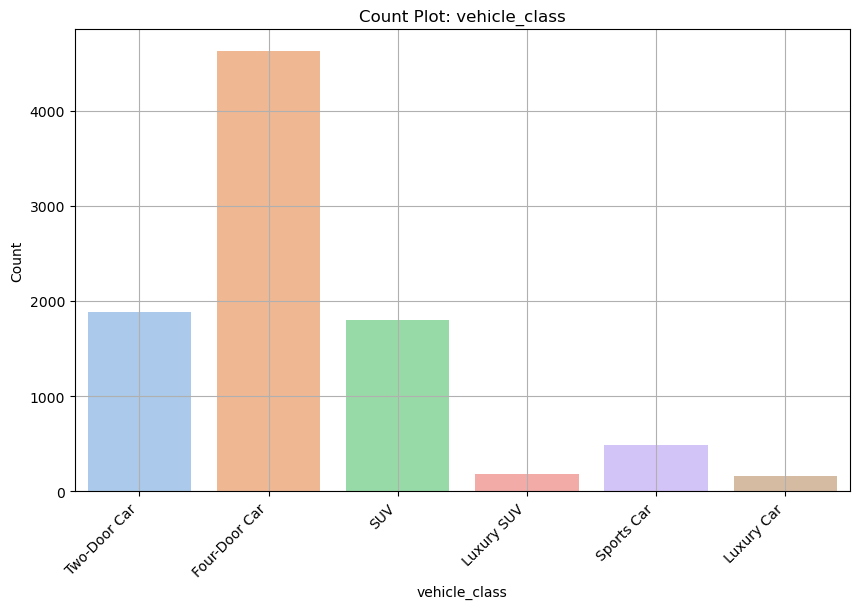

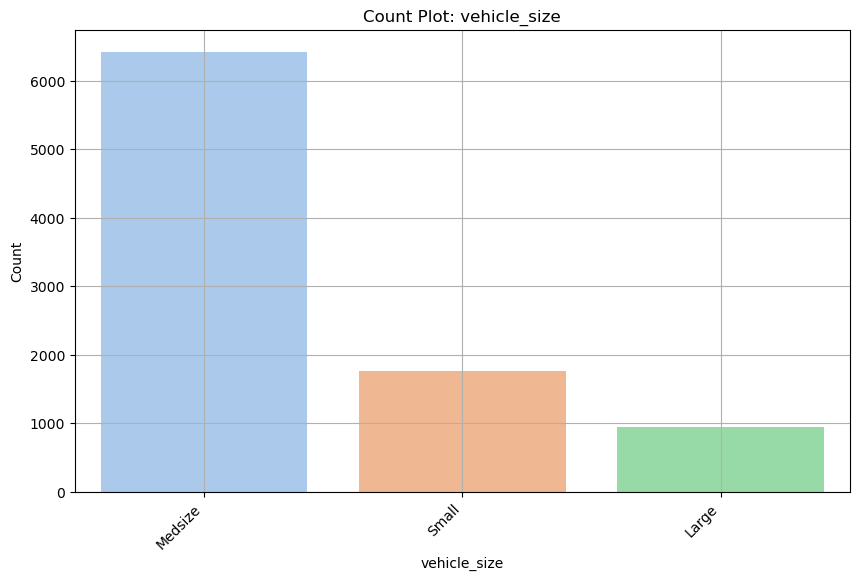

In [111]:
for categorical_var in cat:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=categorical_var, data=cat, palette='pastel')
    plt.xlabel(categorical_var)
    plt.ylabel('Count')
    plt.title(f'Count Plot: {categorical_var}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

#8. Check for NaNs

In [ ]:
We will analyse outliers by representing them in box-plots

In [ ]:
customer_lifetime_value
income
monthly_premium_auto
months_since_last_claim
months_since_policy_inception
number_of_open_complaints
number_of_policies
total_claim_amount

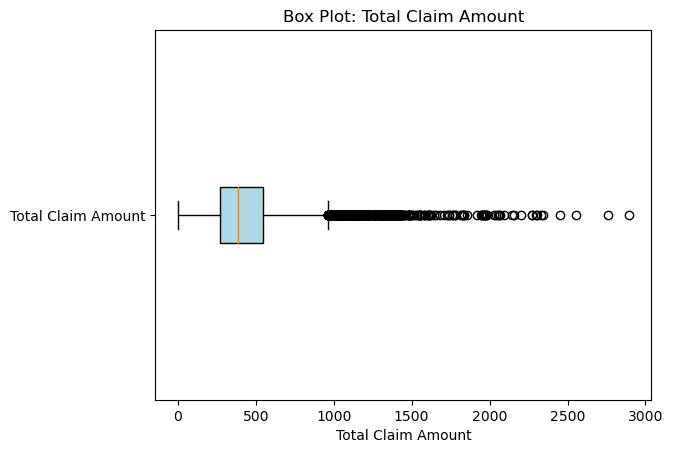

In [117]:
plt.boxplot(num['total_claim_amount'], vert=False, labels=['Total Claim Amount'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Total Claim Amount')
plt.title('Box Plot: Total Claim Amount')
plt.show()

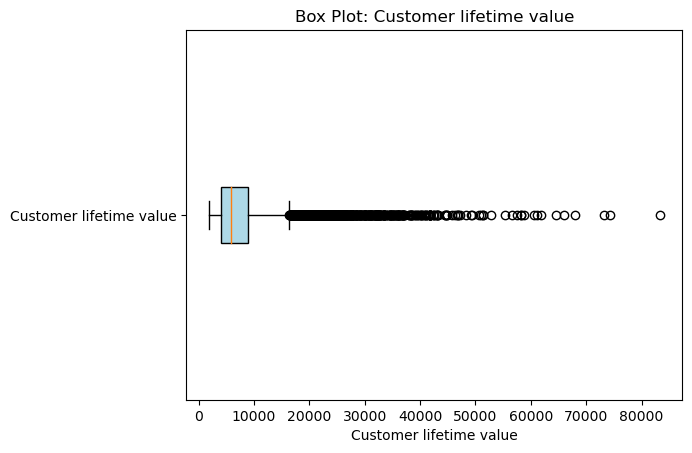

In [120]:
plt.boxplot(num['customer_lifetime_value'], vert=False, labels=['Customer lifetime value'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Customer lifetime value')
plt.title('Box Plot: Customer lifetime value')
plt.show()

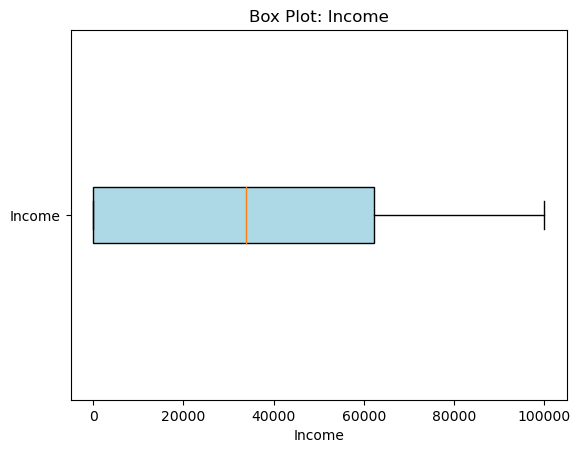

In [121]:
plt.boxplot(num['income'], vert=False, labels=['Income'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Income')
plt.title('Box Plot: Income')
plt.show()

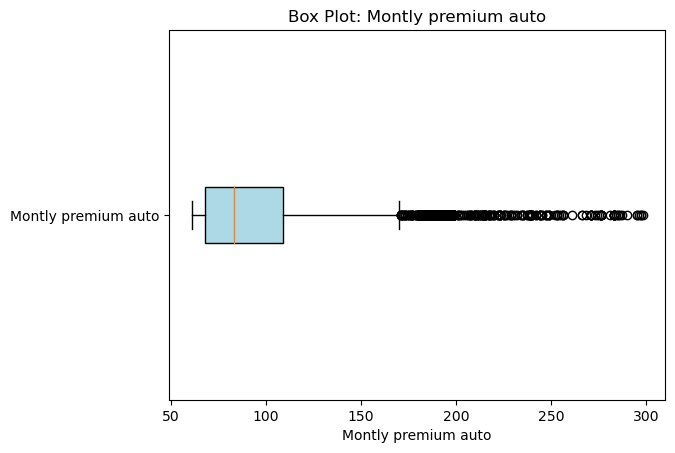

In [122]:
plt.boxplot(num['monthly_premium_auto'], vert=False, labels=['Montly premium auto'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Montly premium auto')
plt.title('Box Plot: Montly premium auto')
plt.show()

Outliers can be removed by applying the IQR (inter-quartile range) method, which involves removing those values that are below Q1 (25%) and above Q3 (75%). 

# 9. Check for NaNs

In [129]:
nan_counts = customer_df_2.isna().sum()
print(nan_counts)

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [ ]:
There are no NaNs in the dataset provided